# Project Sprint 3:
Inference 2: Relationship between song duration and song popularity

Goal: Turn raw rows into **insight** with pandas; Utilize Seaborn visuals


## Data Updates:
  - For this sprint, I shifted focus to involve song energy levels along with duration and popularity.
  - The dataframe used for the visualization plots was adjusted to include more data this time around: is_popular column holding a binary value, and energy level holding a value between 0 and 1.
  - New visualizations include a box categorical plot as well as a polynomial regression plot.




# Load

In [ ]:
import pandas as pd
import kagglehub
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from kagglehub import KaggleDatasetAdapter

%matplotlib inline

# Download the latest dataset from kaggle
downloaded_path = kagglehub.dataset_download("thedevastator/spotify-tracks-genre-dataset")

# Load the dataset using dataset_load
songs = kagglehub.dataset_load(
  KaggleDatasetAdapter.PANDAS,
  "thedevastator/spotify-tracks-genre-dataset",
  "train.csv",
)

songs.head()

Using Colab cache for faster access to the 'spotify-tracks-genre-dataset' dataset.
Using Colab cache for faster access to the 'spotify-tracks-genre-dataset' dataset.


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [ ]:
songs.tail()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.235,...,-16.393,1,0.0422,0.640,0.928,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.117,...,-18.318,0,0.0401,0.994,0.976,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.329,...,-10.895,0,0.0420,0.867,0.000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.506,...,-10.889,1,0.0297,0.381,0.000,0.2700,0.4130,135.960,4,world-music
113999,113999,2hETkH7cOfqmz3LqZDHZf5,Cesária Evora,Miss Perfumado,Barbincor,22,241826,False,0.526,0.487,...,-10.204,0,0.0725,0.681,0.000,0.0893,0.7080,79.198,4,world-music


# Inspect
Gather general information about the dataset

In [ ]:
# dataset info
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [ ]:
# dataset statistics
songs.describe()

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,32909.109681,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,56999.500000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.250000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [ ]:
# check for null values
songs[songs.isnull().any(axis=1)]

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
65900,65900,1kR4gIb7nGxHPI3D2ifs59,NaN,NaN,NaN,0,0,False,0.501,0.583,...,-9.46,0,0.0605,0.69,0.00396,0.0747,0.734,138.391,4,k-pop


# Transform

In [ ]:
# narrow down focus to song duration and song energy with a popularity boolean

# add series for duration in minutes
songs["duration_min"] = songs.duration_ms / 60000

# add series for binary popularity
# song is popular if popularity value > 70
songs["is_popular"] = songs.popularity.apply(lambda x: 1 if x > 70 else 0)

# add series for grouping songs by song length (intervals of 2 minutes)
# categorical bucketing:
#   songs are grouped by duration in buckets of 0-2 minutes, 2-4 minutes, ... , 10+ minutes
#   bins are right-inclusive (upper boundary)
songs["duration_group"] = pd.cut(
    songs.duration_min,
    bins=[0, 2, 4, 6, 8, 10, songs.duration_min.max()],
    labels=["0-2", "2-4", "4-6", "6-8", "8-10", "10+"]
)

# new dataframe for relevant information (duration, energy, is_popular)
songs_filtered = songs[["duration_min", "duration_group","energy", "is_popular"]].dropna()
songs_filtered.head()

,duration_min,duration_group,energy,is_popular
0,3.844433,2-4,0.4610,1
1,2.493500,2-4,0.1660,0
2,3.513767,2-4,0.3590,0
3,3.365550,2-4,0.0596,1
4,3.314217,2-4,0.4430,1


The goal with this dataframe is to observe any possible relationships between song duration and energy (Are longer songs less energetic on average? Are short songs more energetic? What do outliers look like? etc.). With the is_popular data, we can also observe a certain threshold of where songs are most popular on top of this relationship.

# Group / Summarize

In [ ]:
# grouping and aggregation

# new filtered songs data frame is grouped song's duration bin
# each group is aggregated by its mean and max to observe popularity details
# sort by mean and display in descending order
songs_filtered.groupby("duration_group").popularity.agg(["mean", "max"]).sort_values(by="mean", ascending=False)

/tmp/ipython-input-1607062101.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  songs_filtered.groupby("duration_group").popularity.agg(["mean", "max"]).sort_values(by="mean", ascending=False)


,mean,max
duration_group,,
4-6,34.289651,97
2-4,33.699343,100
8-10,29.222556,81
6-8,29.202301,85
0-2,28.394507,89
10+,24.590381,67


In [ ]:
# consider distribution of songs within each bin

# filtered songs are grouped by their duration bin
# list the amount of songs within each bin
songs_filtered.groupby("duration_group").size()

/tmp/ipython-input-254982056.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  songs_filtered.groupby("duration_group").size()


,0
duration_group,
0-2,6299
2-4,68520
4-6,31424
6-8,5823
8-10,1330
10+,603


# Visualize

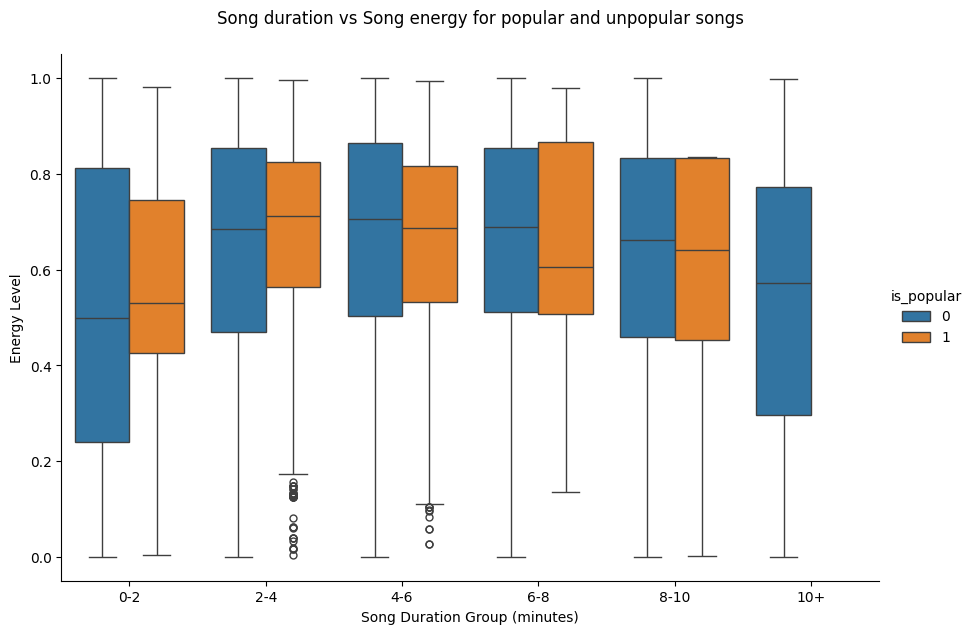

In [ ]:
# visualize data with categorical distributions

g=sns.catplot(
    data=songs_filtered,
    x="duration_group",
    y="energy",
    hue="is_popular",
    kind="box",
    height=6,
    aspect=1.5
)

# descriptive titles
g.fig.suptitle("Song duration vs Song energy for popular and unpopular songs", y=1.05);
g.set_axis_labels("Song Duration Group (minutes)", "Energy Level")

Here I utilized a box plot to display the data relative to the duration buckets created in data transformation. The data is categorized by popular songs (blue) and unpopular songs (orange) to observe any possible relationships of popularity within the duration vs. energy plot.

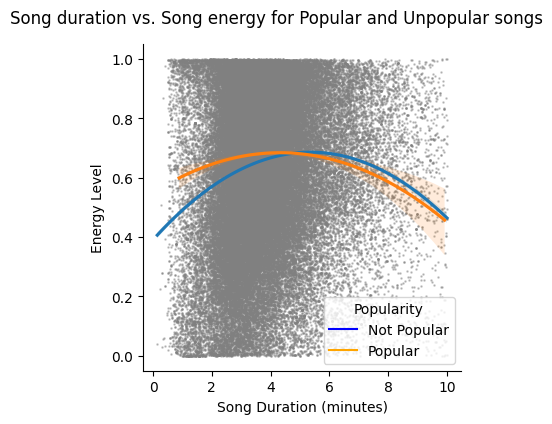

In [ ]:
#visualize data with regression lines


g=sns.lmplot(
    data=songs_filtered[songs_filtered.duration_min < 10],
    x="duration_min",
    y="energy",
    hue="is_popular",
    height=4,
    ci=95,
    order=2,
    markers='.',
    scatter_kws={"color":"grey", "alpha": 0.4, 's':3},
    legend=False  # no need, manually creating new legend
)

# descriptive titles
g.fig.suptitle("Song duration vs. Song energy for Popular and Unpopular songs", y=1.05);
g.set_axis_labels("Song Duration (minutes)", "Energy Level")

# manually create legend for regression lines (popular and unpopular)
line_unpop = mlines.Line2D([], [], color="blue", label="Not Popular")
line_pop   = mlines.Line2D([], [], color="orange", label="Popular")
plt.legend(handles=[line_unpop, line_pop], title="Popularity")

For this regression plot, I created two regression lines over duration vs. energy: one for popular songs, and one for unpopular songs.

*Note: There are no popular songs for those exceeding a duration of 10 minutes. So, I narrowed down the graph to exclude those data plots*

This plot utilizes a confidence interval of 95% due to the noisiness of the data, especially within the data for longer songs (>8 minutes). The shaded region of the orange regression line shows this level of uncertainty. Additionally, It is order: 2, to show the polynomial regression trend in the data.




# Findings

Some key findings from the data (PA2):
  - Songs of length 4-6 minutes seem to have the highest average popularity, closely followed by songs of length 2-4 minutes. This insight is backed by both the tabular data in Group / Summarize, as well as the graphs in Visualize.
  - The 2-4 and 4-6 minute bins have the most amount of song entries within them, and are also the most popular above the other bins. This could suggest that there is a trend in music currently that favors songs of this length.
  - Songs around the 10+ minute range are both fewer in numbers and lower in popularity values (both averages and maximums)
  - While the songs in the 4-6 minute range have the highest average popularity, songs in the 2-4 minute range have higher peaks.


PA3 Findings:
  - The general trend in both visualization graphs show that there is a peak in energy levels of songs within the 2-8 minute range. Songs shorter or longer than these trend towards lower levels of energy.
  - The box plot suggests that popular songs tend to have a very slightly higher energy level on average. This indicates that people generally gravitate toward energetic songs.
  - The regression plot shows that the peak of energy levels of popular songs is located at a slightly shorter duration value than that of unpopular songs. This suggests that people favor shorter songs on average.